# Price Prediction with PCA: Comprehensive Evaluation
This notebook extends the PCA analysis by evaluating models with additional metrics:
- **R² (Coefficient of Determination)**: Proportion of variance explained by the model (closer to 1 is better)
- **RMSE (Root Mean Squared Error)**: Square root of MSE, in the same units as the target variable
- **MAE (Mean Absolute Error)**: Average absolute difference between predictions and actuals

We compare model performance with and without PCA to understand the trade-off between dimensionality reduction and predictive accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Dataset Info:
Shape: (150, 5)

Missing values: 0

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


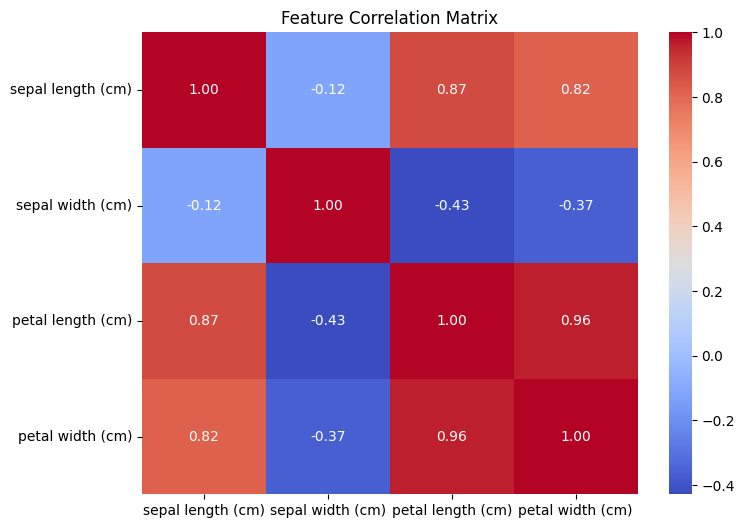

In [2]:
# Load Iris dataset and perform EDA
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("\nBasic statistics:")
print(df.describe())

# Check correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [3]:
# Prepare data (predict petal length from other features)
X = df.drop(['petal length (cm)', 'target'], axis=1)
y = df['petal length (cm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 105
Testing samples: 45


In [4]:
# Model WITHOUT PCA
model_no_pca = LinearRegression()
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)

# Calculate metrics
r2_no_pca = r2_score(y_test, y_pred_no_pca)
rmse_no_pca = np.sqrt(mean_squared_error(y_test, y_pred_no_pca))
mae_no_pca = mean_absolute_error(y_test, y_pred_no_pca)

print("=== Model WITHOUT PCA ===")
print(f"R² Score: {r2_no_pca:.4f}")
print(f"RMSE: {rmse_no_pca:.4f}")
print(f"MAE: {mae_no_pca:.4f}")

=== Model WITHOUT PCA ===
R² Score: 0.9676
RMSE: 0.3303
MAE: 0.2420


Explained variance by each component: [0.61756018 0.32672753]
Total variance retained: 0.9443


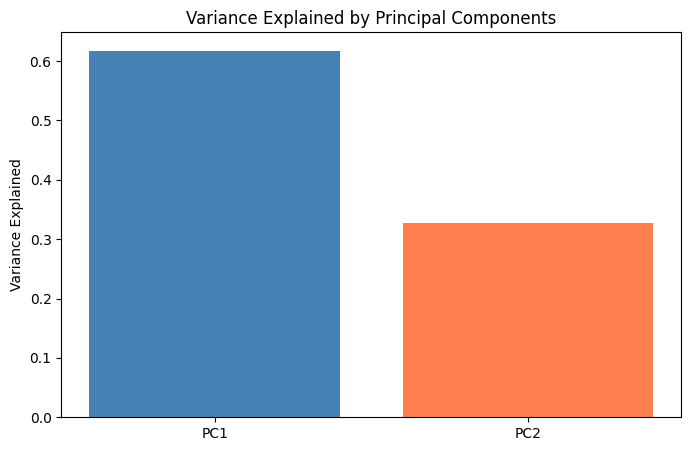

In [5]:
# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance by each component: {pca.explained_variance_ratio_}")
print(f"Total variance retained: {sum(pca.explained_variance_ratio_):.4f}")

# Visualize principal components
plt.figure(figsize=(8, 5))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_, color=['steelblue', 'coral'])
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

In [6]:
# Model WITH PCA
model_with_pca = LinearRegression()
model_with_pca.fit(X_train_pca, y_train)
y_pred_pca = model_with_pca.predict(X_test_pca)

# Calculate metrics
r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
mae_pca = mean_absolute_error(y_test, y_pred_pca)

print("\n=== Model WITH PCA ===")
print(f"R² Score: {r2_pca:.4f}")
print(f"RMSE: {rmse_pca:.4f}")
print(f"MAE: {mae_pca:.4f}")


=== Model WITH PCA ===
R² Score: 0.9644
RMSE: 0.3464
MAE: 0.2651



=== Performance Comparison ===
Metric  Without PCA  With PCA
    R²     0.967636  0.964418
  RMSE     0.330349  0.346382
   MAE     0.241969  0.265126


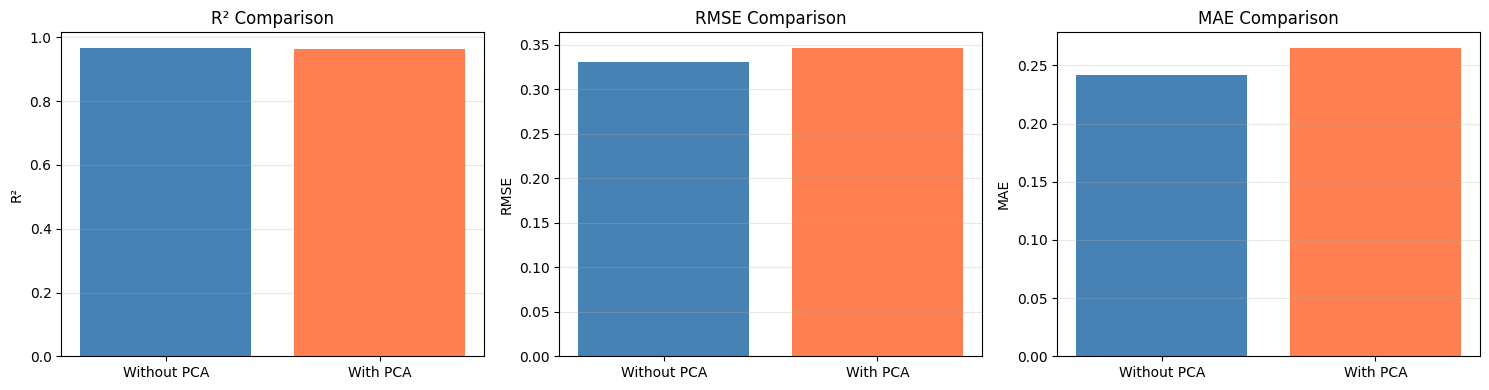

In [7]:
# Comprehensive comparison
comparison = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Without PCA': [r2_no_pca, rmse_no_pca, mae_no_pca],
    'With PCA': [r2_pca, rmse_pca, mae_pca]
})

print("\n=== Performance Comparison ===")
print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
metrics = ['R²', 'RMSE', 'MAE']
colors = ['steelblue', 'coral']

for i, metric in enumerate(metrics):
    values = [comparison.loc[i, 'Without PCA'], comparison.loc[i, 'With PCA']]
    axes[i].bar(['Without PCA', 'With PCA'], values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()